#### Linear Regression

In linear regression models, the target value is modeled as a linear combination of the features. The model is trained on a dataset with known target values. The model can then be used to predict the target value for new data points.

The linear regression model is defined as:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $y$ is the target value, $x_1$ to $x_n$ are the feature values, and $w_0$ to $w_n$ are the model parameters. The model parameters are learned during the training process using the least squares method.

The linear regression model can be extended to include non-linear features by using a non-linear transformation of the features. For example, the model can be extended to include quadratic features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$$

The linear regression model can also be extended to include interaction features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2$$

The linear regression model can be extended to include polynomial features and interaction features at the same time as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2$$

We will now extend the linear regression model to include multiple features.  For the data, we will use a dataset that contains information about effect of various forms of advertising media on product sales. We read the data from a CSV file into a Pandas DataFrame.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


The first step is to look at the data.  A reasonable first step is to plot sales vs. each of the features, individually.

Text(0, 0.5, 'Sales')

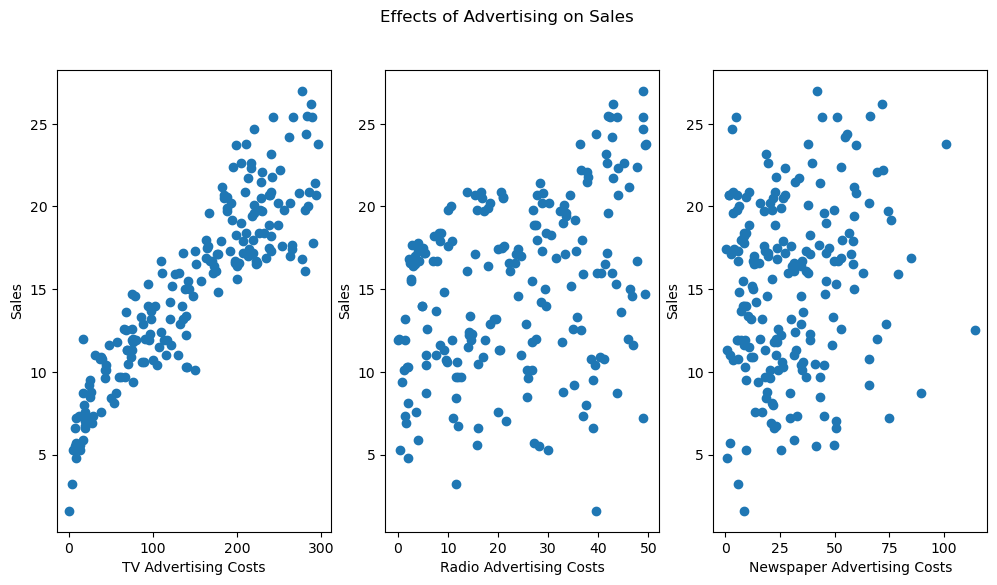

In [4]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Effects of Advertising on Sales")
ax[0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('TV Advertising Costs')
ax[0].set_ylabel('Sales')

ax[1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('Radio Advertising Costs')
ax[1].set_ylabel('Sales')

ax[2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Newspaper Advertising Costs')
ax[2].set_ylabel('Sales')

### Initial Observations

It would appear that the strongest dependence is on TV Advertising Costs.  There is a weaker dependence on Radio Advertising Costs.  There is no obvious dependence on Newspaper Advertising Costs.

We will now fit a linear regression model to the data.  We will use the Statsmodels package to fit the model.  The Statsmodels package is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.  The Statsmodels package is built on top of the NumPy and SciPy packages.

Once we have completed the fit, we can calculate a new column in the DataFrame that contains the predicted values.  We can then plot the predicted values against the actual values to see how well the model fits the data.

Finally, we can calculate a second new column which contains the residuals - the difference between the actual values and the predicted values.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.932    
Dependent Variable: Sales            AIC:                704.2033 
Date:               2023-09-20 13:00 BIC:                737.1865 
No. Observations:   200              Log-Likelihood:     -342.10  
Df Model:           9                F-statistic:        306.2    
Df Residuals:       190              Prob (F-statistic): 4.97e-108
R-squared:          0.936            Scale:              1.8860   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           5.2886   0.5291  9.9961 0.0000  4.2450  6.3322
TV                  0.0762   0.0050 15.3197 0.0000  0.0664  0.0860
Radio              -0.0372   0.0279 -1.3347 0.1836 -0.0921  0.0178
Newspaper          -0.0100   0.0177 -0.5661 0.5720 -0.0448  0.0248
TV:Newspaper 

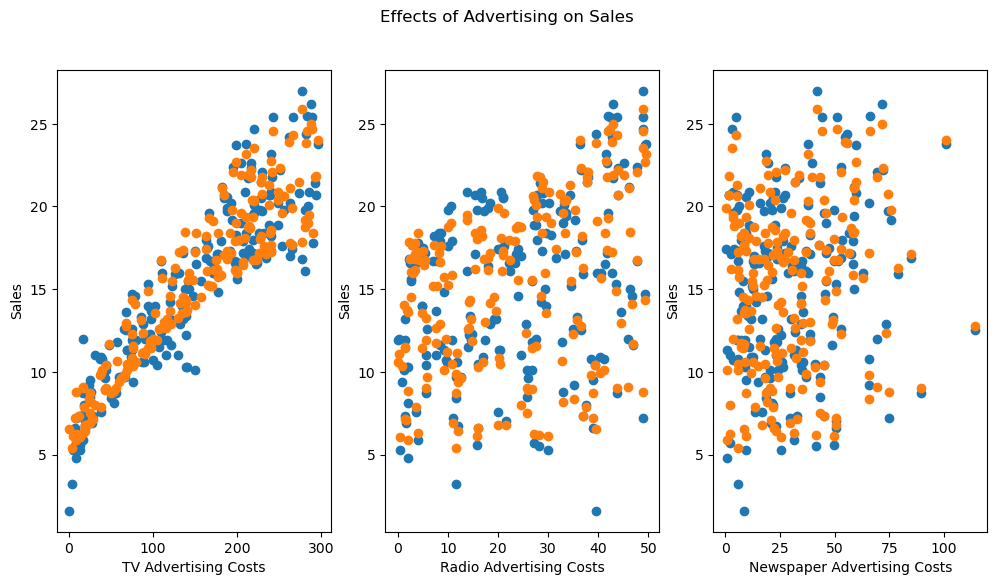

In [5]:
# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
fig, ax = plt.subplots(1, 3, figsize=(12,6))
model = smf.ols('Sales ~ TV + Radio + Newspaper + TV * Newspaper + TV * Radio + Radio * Newspaper + I(TV ** 2) + I(Radio ** 2) + I(Newspaper ** 2)', data=advert)
model = model.fit()

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_Mod'] = sales_pred

# Plot regression against actual data

fig.suptitle("Effects of Advertising on Sales")
ax[0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].plot(advert['TV'], advert['Sales_Mod'], 'o', label = "Data")
ax[0].set_xlabel('TV Advertising Costs')
ax[0].set_ylabel('Sales')

ax[1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].plot(advert['Radio'], advert['Sales_Mod'], 'o', label = "Data")
ax[1].set_xlabel('Radio Advertising Costs')
ax[1].set_ylabel('Sales')

ax[2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].plot(advert['Newspaper'], advert['Sales_Mod'], 'o', label = "Data")
ax[2].set_xlabel('Newspaper Advertising Costs')
ax[2].set_ylabel('Sales')

print(model.summary2())


Looking at the model summary for the full model, there are numerous terms that are not statistically significant. The newspaper, TV:Newspaper, Radio:Newspaper, and Newspaper squared terms are all statistically zero. Next we will remove those terms and create a new model.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.933    
Dependent Variable: Sales            AIC:                697.3544 
Date:               2023-09-20 13:00 BIC:                717.1443 
No. Observations:   200              Log-Likelihood:     -342.68  
Df Model:           5                F-statistic:        559.3    
Df Residuals:       194              Prob (F-statistic): 3.87e-113
R-squared:          0.935            Scale:              1.8577   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       5.1530    0.4499  11.4525  0.0000   4.2656   6.0404
TV              0.0755    0.0049  15.4730  0.0000   0.0659   0.0852
Radio          -0.0335    0.0271  -1.2368  0.2177  -0.0870   0.0199
TV:Radio        0.0004    0.0001   5.4589  0.0000   0.0003   0.0006
I(TV *

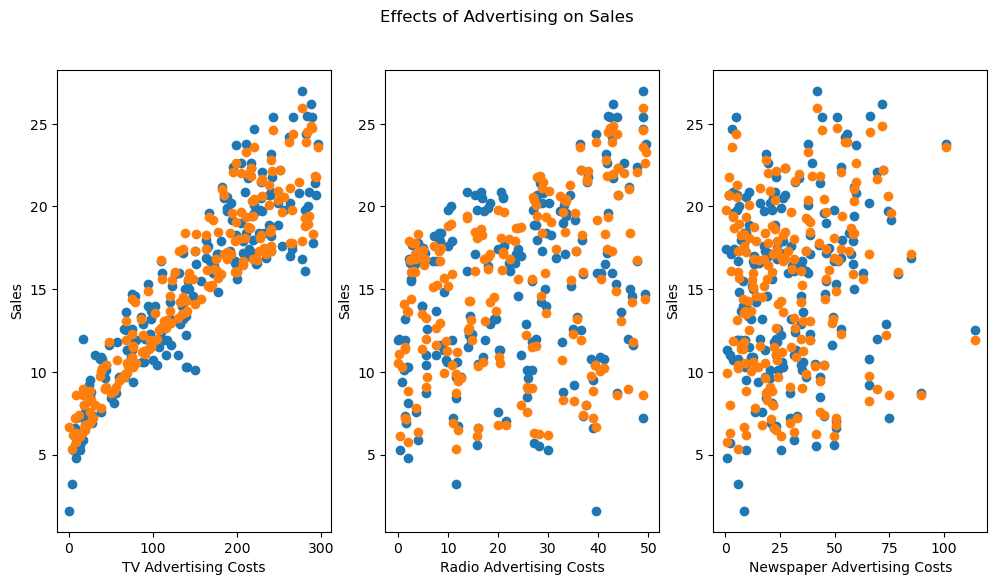

In [6]:
# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
fig, ax = plt.subplots(1, 3, figsize=(12,6))
model = smf.ols('Sales ~ TV + TV * Radio + I(TV ** 2) + I(Radio ** 2)', data=advert)
model = model.fit()

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_Mod'] = sales_pred

# Plot regression against actual data

fig.suptitle("Effects of Advertising on Sales")
ax[0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].plot(advert['TV'], advert['Sales_Mod'], 'o', label = "Data")
ax[0].set_xlabel('TV Advertising Costs')
ax[0].set_ylabel('Sales')

ax[1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].plot(advert['Radio'], advert['Sales_Mod'], 'o', label = "Data")
ax[1].set_xlabel('Radio Advertising Costs')
ax[1].set_ylabel('Sales')

ax[2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].plot(advert['Newspaper'], advert['Sales_Mod'], 'o', label = "Data")
ax[2].set_xlabel('Newspaper Advertising Costs')
ax[2].set_ylabel('Sales')

print(model.summary2())
